In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

### Часть 1

План анализа данных по гос экзамену студентов, которые были разбиты на 4 варианта, спосок вопросов - одинаковый, но у каждого варианта своя последовательность этих вопросов:
- получить рубежные баллы для квантильных оценок (см. таблицу по квантильной оценке - ниже)
- присвоить студенту набранные баллы (как по 10 бальной шкале, так и по традиционной)
- вывести результат в виде 4 отдельных таблиц для оценок «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

Таблица распределения оценок:

| Правильные ответы   | 10 бальная шкала | Традиционная шкала | Процентильный расчет        |
| ------------------- | ---------------- | ------------------ | --------------------------- |
| 0                   | 0                | неудовлет.         |                             |
| 1                   | 1                | неудовлет.         |                             |
| 2-3                 | 2                | неудовлет.         |                             |
| 4                   | 3                | неудовлет.         |                             |
| \[5,Rb4)            | 4                | удовл.             | Rb4 = Процентиль(stat, 1/6) |
| \[RB4,Rb5)          | 5                | удовл.             | Rb5 =Процентиль(stat, 1/3)  |
| \[RB5,Rb6)          | 6                | хорошо             | Rb6 = Процентиль(stat, 1/2) |
| \[RB6,Rb7)          | 7                | хорошо             | Rb7 = Процентиль(stat, 2/3) |
| \[RB7,Rb8)          | 8                | отлично            | Rb8 = Процентиль(stat, 7/9) |
| \[RB80,Rb9)         | 9                | отлично            | Rb9 = Процентиль(stat, 8/9) |
| Более или равно RB9 | 10               | отлично            |                             |


In [2]:
data1 = pd.read_excel('C:/Users/79653/Desktop/ввад/GOS 2019 for AD.xlsx', sheet_name=0).fillna(0).astype(int)
data2 = pd.read_excel('C:/Users/79653/Desktop/ввад/GOS 2019 for AD.xlsx', sheet_name=1).fillna(0).astype(int)
data3 = pd.read_excel('C:/Users/79653/Desktop/ввад/GOS 2019 for AD.xlsx', sheet_name=2).fillna(0).astype(int)
data4 = pd.read_excel('C:/Users/79653/Desktop/ввад/GOS 2019 for AD.xlsx', sheet_name=3).fillna(0).astype(int)
data5 = pd.read_excel('C:/Users/79653/Desktop/ввад/GOS 2019 for AD.xlsx', sheet_name=4).iloc[:40].astype(int)

Первые четыре листа, извлеченные из excel - результаты студентов (по вариантам), пятый - соответствие вариантов (относительно первого)

In [3]:
data1_n = data1.iloc[:,2:].isin(data1['Верный ответ'])
data2 = data2.set_index(data5.iloc[:,1]).sort_index()
data2_n = data2.iloc[:,2:].isin(data2['Верный ответ'])
data2_n.index = data2_n.index - 1
data3 = data3.set_index(data5.iloc[:,2]).sort_index()
data3_n = data3.iloc[:,2:].isin(data3['Верный ответ'])
data3_n.index = data3_n.index - 1
data4 = data4.set_index(data5.iloc[:,3]).sort_index()
data4_n = data4.iloc[:,2:].isin(data4['Верный ответ'])
data4_n.index = data4_n.index - 1

In [4]:
bool_balls = data1_n.merge(data2_n, on = data1_n.index).iloc[:,1:].merge(
    data3_n, on = data1_n.index).iloc[:,1:].merge(data4_n, on = data1_n.index).iloc[:,1:]
results = bool_balls.sum(axis = 0)
bool_balls['SUM'] = bool_balls.sum(axis = 1)
bool_balls.head() 
# склеиваем данные по всем вариантам, сопоставляя вопросы 2, 3, 4 вариантов с последовательностью вопросов 1го варианта

,student101,student102,student103,student104,student105,student106,student107,student108,student109,student110,...,student408,student409,student410,student411,student412,student413,student414,student415,student416,SUM
0,True,False,False,True,False,False,False,False,True,True,...,False,True,False,False,True,True,True,True,False,28
1,True,True,True,True,True,False,True,False,False,True,...,False,False,False,True,False,True,False,True,False,38
2,True,True,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,True,False,17
3,False,False,False,False,False,False,True,False,False,True,...,False,True,True,True,True,True,False,True,True,25
4,False,False,False,False,False,True,False,True,False,False,...,False,True,False,False,True,False,False,True,False,19


In [5]:
percent = [1/6,1/3,1/2,2/3,7/9,8/9]
percentil = []
for i in percent:
    percentil.append(np.percentile(results,i*100,interpolation = 'lower'))
percentil 
# ищем нужные нам перцентили по выборке, округляя их в меньшую сторону (так принято)

[15, 19, 21, 23, 25, 28]

In [6]:
df = pd.DataFrame({'students':bool_balls.columns[:-1],
                  'nacop_ballov': results.values})
df.head() 
# находим количество правильных ответов для каждого студента

,students,nacop_ballov
0,student101,25
1,student102,22
2,student103,24
3,student104,18
4,student105,21


In [7]:
df.loc[df.nacop_ballov >= percentil[5],'10_marks'] = 10
df.loc[df.nacop_ballov < percentil[5],'10_marks'] = 9
df.loc[df.nacop_ballov < percentil[4],'10_marks'] = 8
df.loc[df.nacop_ballov < percentil[3],'10_marks'] = 7
df.loc[df.nacop_ballov < percentil[2],'10_marks'] = 6
df.loc[df.nacop_ballov < percentil[1],'10_marks'] = 5
df.loc[df.nacop_ballov < percentil[0],'10_marks'] = 4
df.loc[df.nacop_ballov < 5,'10_marks'] = 3
df.loc[df.nacop_ballov <= 3,'10_marks'] = 2
df.loc[df.nacop_ballov <= 1,'10_marks'] = 1
df.loc[df.nacop_ballov <= 0,'10_marks'] = 0
df['10_marks'] = df['10_marks'].astype(int)

df.loc[df['10_marks'] >= 8,'word_marks'] = 'отлично'
df.loc[df['10_marks'] < 8,'word_marks'] = 'хорошо'
df.loc[df['10_marks'] < 6,'word_marks'] = 'удовл'
df.loc[df['10_marks'] < 4,'word_marks'] = 'неудовл'

df.head()
# распределяем оценки (по таблице оценок - выше)

,students,nacop_ballov,10_marks,word_marks
0,student101,25,9,отлично
1,student102,22,7,хорошо
2,student103,24,8,отлично
3,student104,18,5,удовл
4,student105,21,7,хорошо


In [8]:
display(df[df['word_marks'] == 'отлично'].sort_values(['nacop_ballov','students'],ascending = False))
display(df[df['word_marks'] == 'хорошо'].sort_values(['nacop_ballov','students'],ascending = False))
display(df[df['word_marks'] == 'удовл'].sort_values(['nacop_ballov','students'],ascending = False))
display(df[df['word_marks'] == 'неудовл'].sort_values(['nacop_ballov','students'],ascending = False))
# выводим 4 отдельных таблиц для оценок «отлично», «хорошо», «удовлетворительно», «неудовлетворительно» - сортируем по баллам

,students,nacop_ballov,10_marks,word_marks
22,student207,36,10,отлично
66,student415,35,10,отлично
19,student204,33,10,отлично
29,student214,32,10,отлично
16,student201,32,10,отлично
18,student203,31,10,отлично
12,student113,30,10,отлично
39,student306,29,10,отлично
63,student412,28,10,отлично
32,student217,28,10,отлично


,students,nacop_ballov,10_marks,word_marks
56,student405,22,7,хорошо
51,student318,22,7,хорошо
20,student205,22,7,хорошо
1,student102,22,7,хорошо
61,student410,21,7,хорошо
60,student409,21,7,хорошо
57,student406,21,7,хорошо
50,student317,21,7,хорошо
44,student311,21,7,хорошо
23,student208,21,7,хорошо


,students,nacop_ballov,10_marks,word_marks
38,student305,18,5,удовл
3,student104,18,5,удовл
46,student313,17,5,удовл
11,student112,17,5,удовл
67,student416,16,5,удовл
59,student408,16,5,удовл
54,student403,16,5,удовл
7,student108,16,5,удовл
62,student411,15,5,удовл
58,student407,15,5,удовл


,students,nacop_ballov,10_marks,word_marks


Все студенты сдали гос экзамен - нет "неудовл", большинство сдали на "хорошо", "отлично"

### Часть 2

Анализируем результаты по кафедрам и сложности вопросов:
- анализируем статистики ответов по различным дисциплинам - распределение вопросов по дициплинам - в конце 5 листа в excel
- визуализируем статистики ответов по различным дисциплинам
- строим таблицу для каждой дисциплины в отдельности по сложности вопросов


In [9]:
micro = bool_balls[:10].sort_values('SUM',ascending = False)
micro['Percent'] = micro.SUM.map(lambda x: x/micro.SUM.sum()*100)
micro_res = micro[['SUM','Percent']]
macro = bool_balls[10:20].sort_values('SUM',ascending = False)
macro['Percent'] = macro.SUM.map(lambda x: x/macro.SUM.sum()*100)
macro_res = macro[['SUM','Percent']]
econom = bool_balls[20:30].sort_values('SUM',ascending = False)
econom['Percent'] = econom.SUM.map(lambda x: x/econom.SUM.sum()*100)
econom_res = econom[['SUM','Percent']]
finan = bool_balls[30:].sort_values('SUM',ascending = False)
finan['Percent'] = finan.SUM.map(lambda x: x/finan.SUM.sum()*100)
finan_res = finan[['SUM','Percent']]
display(micro_res, macro_res, econom_res, finan_res)
# Выводим результаты для каждой дисциплины отдельно, сортируя данные по сложности вопросов

,SUM,Percent
9,51,16.088328
5,41,12.933754
6,41,12.933754
1,38,11.987382
7,34,10.725552
0,28,8.832808
3,25,7.886435
8,23,7.255521
4,19,5.993691
2,17,5.362776


,SUM,Percent
12,61,14.420804
10,54,12.765957
13,48,11.347518
14,47,11.111111
11,44,10.401891
16,44,10.401891
15,43,10.165485
17,33,7.801418
18,33,7.801418
19,16,3.782506


,SUM,Percent
22,53,11.725664
28,53,11.725664
23,50,11.061947
26,48,10.619469
29,47,10.398230
27,46,10.176991
25,44,9.734513
20,41,9.070796
21,41,9.070796
24,29,6.415929


,SUM,Percent
37,55,21.912351
36,45,17.928287
32,38,15.139442
35,33,13.147410
30,27,10.756972
33,24,9.561753
38,10,3.984064
39,8,3.187251
34,6,2.390438
31,5,1.992032


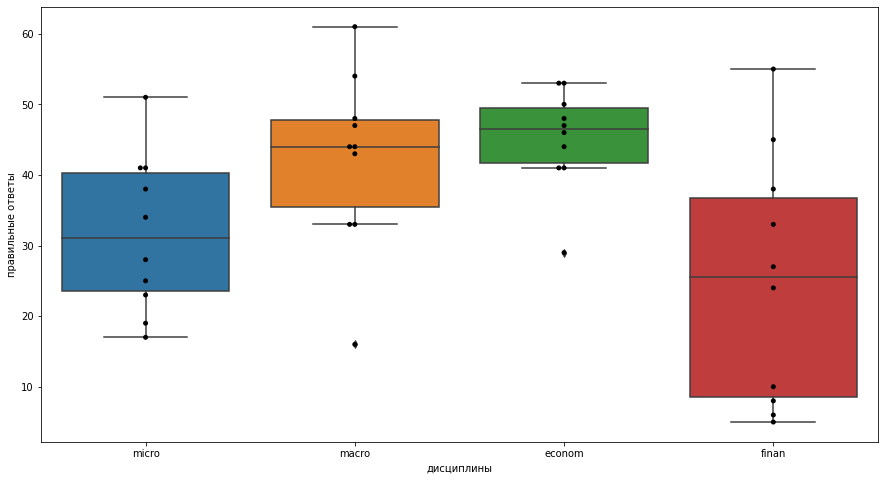

In [10]:
res_dis = pd.DataFrame()
res_dis['micro'] = micro_res.SUM.reset_index(drop=True)
res_dis['macro'] = macro_res.SUM.reset_index(drop=True)
res_dis['econom'] = econom_res.SUM.reset_index(drop=True)
res_dis['finan'] = finan_res.SUM.reset_index(drop=True)
plt.figure(figsize = (15,8))
ax = sns.boxplot(data = res_dis);
ax = sns.swarmplot(data = res_dis, color = 'k');
ax.set(xlabel = 'дисциплины',ylabel = "правильные ответы");
# визуализируем (с помощью boxplot)

По финансам вопросы оказались самыми трудными, по экономике - довольно простые, по макроэкономике - скорее средние, по микре - больше легких, чем сложных